# Election probabilities with perfect information

Using polling averages, 2016 election forecasts told us that Hillary Clinton had anywhere from a 71.4% chance of winning to a 98% probability. The only polls that matter are the ballots cast on election day. In this post, I will assign state by state probabilities and then run 10,000 simulations for the electoral college to determine the true probabilities of victory for every presidential election over the past 40 years.

In [1]:
#%matplotlib inline
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import datetime, random
plt.style.use('ggplot')
from collections import Counter
np.random.seed(seed=2020)

In [2]:
election_data_url = 'https://raw.githubusercontent.com/TheEconomist/us-potus-model/master/data/potus_results_76_16.csv'
election_data = pd.read_csv(election_data_url)

The simulations conducted use the framework written by Drew Lizner. You can read more about it here. https://twitter.com/DrewLinzer/status/1293216071323811845

For his simple model, Linzer assumed a 5% degree of uncertainty in state polls and 3% in national polls. The simulations I will run will do the same. This means that a state poll can be plus or minus 5 points. In addition, the national polls will represent a national trend shifting all state polls in each simulation plus or minus 3 points. 

In [3]:
# Simulation settings
number_of_simulations = 10000

# Uncertainty in state forecasts, around poll average
state_uncertainty_sd = 0.05

# Uncertainty in national forecasts; correlated error with mean zero
national_uncertainty_sd = 0.03

In [4]:
electoral_votes = pd.DataFrame.from_dict({'AL': 9, 'AK': 3, 'AZ': 11, 'AR': 6, 'CA': 55, 'CO': 9,
                                       'CT': 7, 'DE': 3, 'FL': 29, 'GA': 16, 'HI': 4, 'ID': 4,
                                       'IL': 20, 'IN': 11, 'IA': 6, 'KS': 6, 'KY': 8, 'LA': 8,
                                       'ME': 4, 'MD': 10, 'MA': 11, 'MI': 16, 'MN': 10, 'MS': 6,
                                       'MO': 10, 'MT': 3, 'NE': 5, 'NV': 6, 'NH': 4, 'NJ': 14,
                                       'NM': 5, 'NY': 29, 'NC': 15, 'ND': 3, 'OH': 18, 'OK': 7,
                                       'OR': 7, 'PA': 20, 'RI': 4, 'SC': 9, 'SD': 3, 'TN': 11,
                                       'TX': 38, 'UT': 6, 'VT': 3, 'VA': 13, 'WA': 12, 'WV': 5,
                                       'WI': 10, 'WY': 3, 'DC': 3},
                                      orient='index', columns = ['EV'])

# 1980 Election

![1980](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/1980_mov.png)

In [5]:
state_mean = election_data[election_data.year == 1980].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [6]:
%%time
rep_state_wins = pd.Series(0, index = state_mean.index)
rep_state_votes = pd.DataFrame()
rep_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'rep_vote': np.random.normal(state_mean.rep_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['rep_win'] = (one_simulation.rep_vote > 0.5)+0

    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    rep_state_wins = rep_state_wins + one_simulation.rep_win
    rep_state_votes = rep_state_votes.append(one_simulation.rep_vote)
    rep_ev_sim = rep_ev_sim + [(one_simulation.rep_win * one_simulation.EV).sum()]

CPU times: user 45.1 s, sys: 1.86 s, total: 47 s
Wall time: 47 s


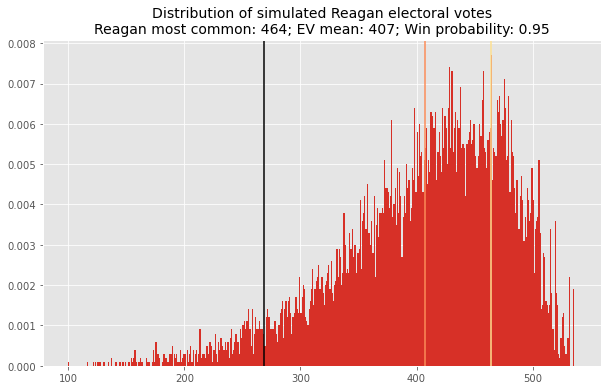

In [7]:
plt.figure(figsize=(10,6))
plt.hist(rep_ev_sim, bins = range(100, 538, 1), density = True, color = '#d73027');
rep_ev_forecast = int(np.array(rep_ev_sim).mean())
rep_most_freq = Counter(rep_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Reagan electoral votes\nReagan most common: %s; EV mean: %s; Win probability: %s'%
          (rep_most_freq, rep_ev_forecast, (np.array(rep_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(rep_ev_forecast, color = '#fc8d59');
plt.axvline(rep_most_freq, color = '#fee090');

# 1984 Election

![1984](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/1984_mov.png)

In [8]:
state_mean = election_data[election_data.year == 1984].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [9]:
%%time
rep_state_wins = pd.Series(0, index = state_mean.index)
rep_state_votes = pd.DataFrame()
rep_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'rep_vote': np.random.normal(state_mean.rep_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['rep_win'] = (one_simulation.rep_vote > 0.5)+0

    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    rep_state_wins = rep_state_wins + one_simulation.rep_win
    rep_state_votes = rep_state_votes.append(one_simulation.rep_vote)
    rep_ev_sim = rep_ev_sim + [(one_simulation.rep_win * one_simulation.EV).sum()]

CPU times: user 43.2 s, sys: 1.76 s, total: 45 s
Wall time: 45 s


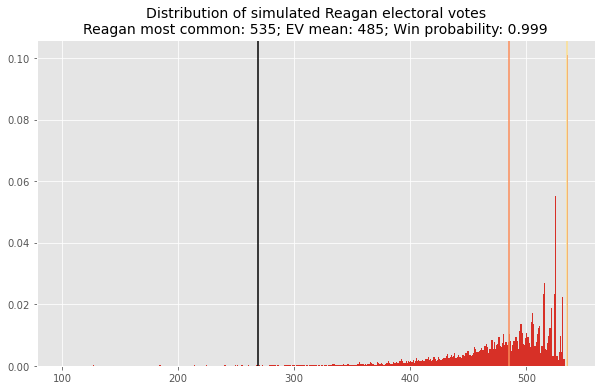

In [10]:
plt.figure(figsize=(10,6))
plt.hist(rep_ev_sim, bins = range(100, 538, 1), density = True, color = '#d73027');
rep_ev_forecast = int(np.array(rep_ev_sim).mean())
rep_most_freq = Counter(rep_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Reagan electoral votes\nReagan most common: %s; EV mean: %s; Win probability: %s'%
          (rep_most_freq, rep_ev_forecast, (np.array(rep_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(rep_ev_forecast, color = '#fc8d59');
plt.axvline(rep_most_freq, color = '#fee090');

# 1988 Election

![1988](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/1988_mov.png)

In [11]:
state_mean = election_data[election_data.year == 1988].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [12]:
%%time
rep_state_wins = pd.Series(0, index = state_mean.index)
rep_state_votes = pd.DataFrame()
rep_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'rep_vote': np.random.normal(state_mean.rep_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['rep_win'] = (one_simulation.rep_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    rep_state_wins = rep_state_wins + one_simulation.rep_win
    rep_state_votes = rep_state_votes.append(one_simulation.rep_vote)
    rep_ev_sim = rep_ev_sim + [(one_simulation.rep_win * one_simulation.EV).sum()]

CPU times: user 42.4 s, sys: 1.7 s, total: 44.1 s
Wall time: 44.2 s


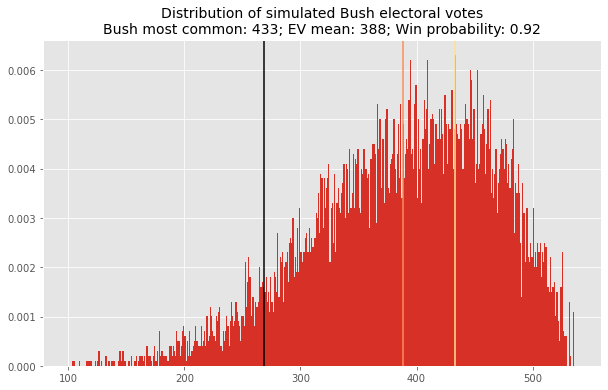

In [13]:
plt.figure(figsize=(10,6))
plt.hist(rep_ev_sim, bins = range(100, 538, 1), density = True, color = '#d73027');
rep_ev_forecast = int(np.array(rep_ev_sim).mean())
rep_most_freq = Counter(rep_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Bush electoral votes\nBush most common: %s; EV mean: %s; Win probability: %s'%
          (rep_most_freq, rep_ev_forecast, (np.array(rep_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(rep_ev_forecast, color = '#fc8d59');
plt.axvline(rep_most_freq, color = '#fee090');

# 1992 Election

![1992](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/1992_mov.png)

In [14]:
state_mean = election_data[election_data.year == 1992].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [15]:
%%time
dem_state_wins = pd.Series(0, index = state_mean.index)
dem_state_votes = pd.DataFrame()
dem_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'dem_vote': np.random.normal(state_mean.dem_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['dem_win'] = (one_simulation.dem_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    dem_state_wins = dem_state_wins + one_simulation.dem_win
    dem_state_votes = dem_state_votes.append(one_simulation.dem_vote)
    dem_ev_sim = dem_ev_sim + [(one_simulation.dem_win * one_simulation.EV).sum()]

CPU times: user 43.6 s, sys: 1.81 s, total: 45.4 s
Wall time: 45.4 s


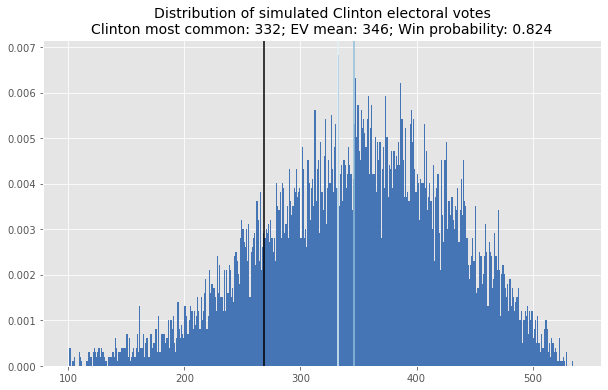

In [16]:
plt.figure(figsize=(10,6))
plt.hist(dem_ev_sim, bins = range(100, 538, 1), density = True, color = '#4575b4');
dem_ev_forecast = int(np.array(dem_ev_sim).mean())
dem_most_freq = Counter(dem_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Clinton electoral votes\nClinton most common: %s; EV mean: %s; Win probability: %s'%
          (dem_most_freq, dem_ev_forecast, (np.array(dem_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(dem_ev_forecast, color = '#91bfdb');
plt.axvline(dem_most_freq, color = '#e0f3f8');

# 1996 Election

![1996](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/1996_mov.png)

In [17]:
state_mean = election_data[election_data.year == 1996].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [18]:
%%time
dem_state_wins = pd.Series(0, index = state_mean.index)
dem_state_votes = pd.DataFrame()
dem_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'dem_vote': np.random.normal(state_mean.dem_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['dem_win'] = (one_simulation.dem_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    dem_state_wins = dem_state_wins + one_simulation.dem_win
    dem_state_votes = dem_state_votes.append(one_simulation.dem_vote)
    dem_ev_sim = dem_ev_sim + [(one_simulation.dem_win * one_simulation.EV).sum()]

CPU times: user 43.2 s, sys: 1.77 s, total: 45 s
Wall time: 45 s


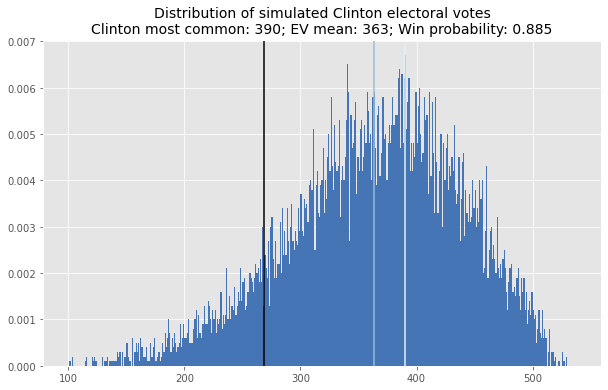

In [19]:
plt.figure(figsize=(10,6))
plt.hist(dem_ev_sim, bins = range(100, 538, 1), density = True, color = '#4575b4');
dem_ev_forecast = int(np.array(dem_ev_sim).mean())
dem_most_freq = Counter(dem_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Clinton electoral votes\nClinton most common: %s; EV mean: %s; Win probability: %s'%
          (dem_most_freq, dem_ev_forecast, (np.array(dem_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(dem_ev_forecast, color = '#91bfdb');
plt.axvline(dem_most_freq, color = '#e0f3f8');

# 2000 Election

![2000](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/2000_mov.png)

In [20]:
state_mean = election_data[election_data.year == 2000].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [21]:
%%time
rep_state_wins = pd.Series(0, index = state_mean.index)
rep_state_votes = pd.DataFrame()
rep_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'rep_vote': np.random.normal(state_mean.rep_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['rep_win'] = (one_simulation.rep_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    rep_state_wins = rep_state_wins + one_simulation.rep_win
    rep_state_votes = rep_state_votes.append(one_simulation.rep_vote)
    rep_ev_sim = rep_ev_sim + [(one_simulation.rep_win * one_simulation.EV).sum()]

CPU times: user 43.4 s, sys: 1.76 s, total: 45.2 s
Wall time: 45.2 s


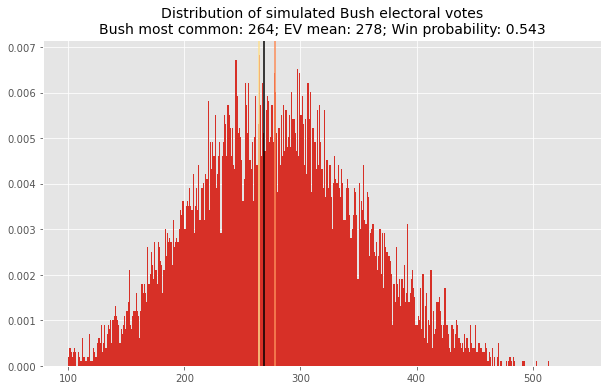

In [22]:
plt.figure(figsize=(10,6))
plt.hist(rep_ev_sim, bins = range(100, 538, 1), density = True, color = '#d73027');
rep_ev_forecast = int(np.array(rep_ev_sim).mean())
rep_most_freq = Counter(rep_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Bush electoral votes\nBush most common: %s; EV mean: %s; Win probability: %s'%
          (rep_most_freq, rep_ev_forecast, (np.array(rep_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(rep_ev_forecast, color = '#fc8d59');
plt.axvline(rep_most_freq, color = '#fee090');

# 2004 Election

![2004](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/2004_mov.png)

In [23]:
state_mean = election_data[election_data.year == 2004].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [24]:
%%time
rep_state_wins = pd.Series(0, index = state_mean.index)
rep_state_votes = pd.DataFrame()
rep_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'rep_vote': np.random.normal(state_mean.rep_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['rep_win'] = (one_simulation.rep_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    rep_state_wins = rep_state_wins + one_simulation.rep_win
    rep_state_votes = rep_state_votes.append(one_simulation.rep_vote)
    rep_ev_sim = rep_ev_sim + [(one_simulation.rep_win * one_simulation.EV).sum()]

CPU times: user 43.5 s, sys: 1.81 s, total: 45.3 s
Wall time: 45.4 s


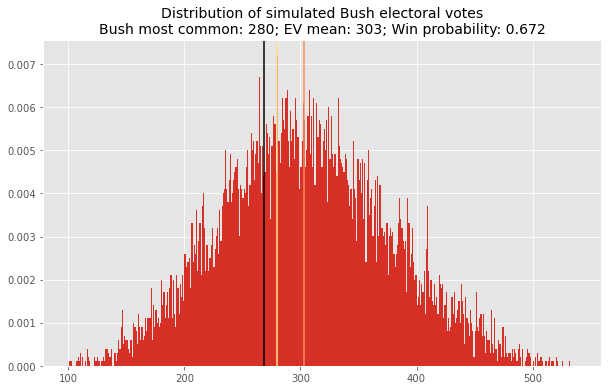

In [25]:
plt.figure(figsize=(10,6))
plt.hist(rep_ev_sim, bins = range(100, 538, 1), density = True, color = '#d73027');
rep_ev_forecast = int(np.array(rep_ev_sim).mean())
rep_most_freq = Counter(rep_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Bush electoral votes\nBush most common: %s; EV mean: %s; Win probability: %s'%
          (rep_most_freq, rep_ev_forecast, (np.array(rep_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(rep_ev_forecast, color = '#fc8d59');
plt.axvline(rep_most_freq, color = '#fee090');

# 2008 Election

![2008](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/2008_mov.png)

In [26]:
state_mean = election_data[election_data.year == 2008].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [27]:
%%time
dem_state_wins = pd.Series(0, index = state_mean.index)
dem_state_votes = pd.DataFrame()
dem_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'dem_vote': np.random.normal(state_mean.dem_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['dem_win'] = (one_simulation.dem_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    dem_state_wins = dem_state_wins + one_simulation.dem_win
    dem_state_votes = dem_state_votes.append(one_simulation.dem_vote)
    dem_ev_sim = dem_ev_sim + [(one_simulation.dem_win * one_simulation.EV).sum()]

CPU times: user 42.2 s, sys: 1.7 s, total: 43.9 s
Wall time: 44 s


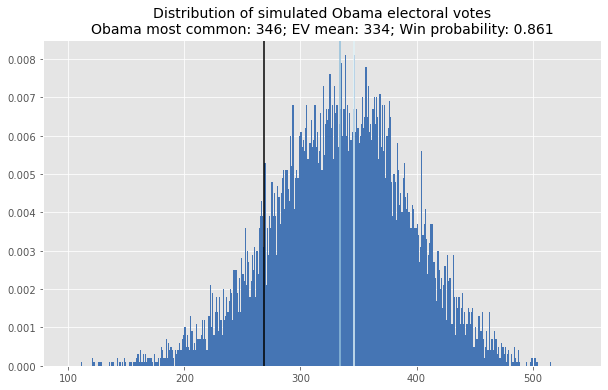

In [28]:
plt.figure(figsize=(10,6))
plt.hist(dem_ev_sim, bins = range(100, 538, 1), density = True, color = '#4575b4');
dem_ev_forecast = int(np.array(dem_ev_sim).mean())
dem_most_freq = Counter(dem_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Obama electoral votes\nObama most common: %s; EV mean: %s; Win probability: %s'%
          (dem_most_freq, dem_ev_forecast, (np.array(dem_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(dem_ev_forecast, color = '#91bfdb');
plt.axvline(dem_most_freq, color = '#e0f3f8');

# 2012 Election

![2012](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/2012_mov.png)

In [29]:
state_mean = election_data[election_data.year == 2012].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [30]:
%%time
dem_state_wins = pd.Series(0, index = state_mean.index)
dem_state_votes = pd.DataFrame()
dem_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'dem_vote': np.random.normal(state_mean.dem_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['dem_win'] = (one_simulation.dem_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    dem_state_wins = dem_state_wins + one_simulation.dem_win
    dem_state_votes = dem_state_votes.append(one_simulation.dem_vote)
    dem_ev_sim = dem_ev_sim + [(one_simulation.dem_win * one_simulation.EV).sum()]

CPU times: user 42 s, sys: 1.68 s, total: 43.7 s
Wall time: 43.7 s


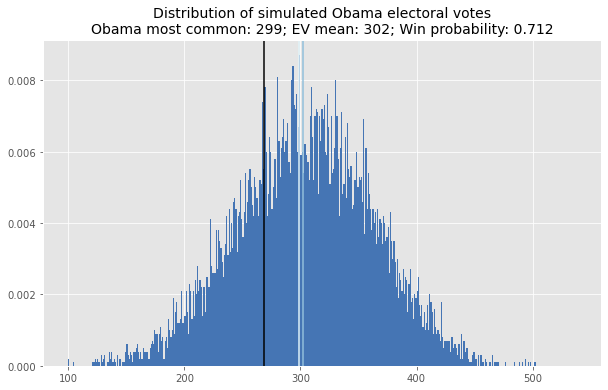

In [31]:
plt.figure(figsize=(10,6))
plt.hist(dem_ev_sim, bins = range(100, 538, 1), density = True, color = '#4575b4');
dem_ev_forecast = int(np.array(dem_ev_sim).mean())
dem_most_freq = Counter(dem_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Obama electoral votes\nObama most common: %s; EV mean: %s; Win probability: %s'%
          (dem_most_freq, dem_ev_forecast, (np.array(dem_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(dem_ev_forecast, color = '#91bfdb');
plt.axvline(dem_most_freq, color = '#e0f3f8');

# 2016 Election

![2016](https://www.270towin.com/historical-presidential-elections/timeline/margin-of-victory/maps/2016_mov.png)

In [32]:
state_mean = election_data[election_data.year == 2016].set_index('state')
state_mean['dem_cand'] = state_mean['dem']/(state_mean['dem'] + state_mean['rep'])
state_mean['rep_cand'] = state_mean['rep']/(state_mean['dem'] + state_mean['rep'])

In [33]:
%%time
rep_state_wins = pd.Series(0, index = state_mean.index)
rep_state_votes = pd.DataFrame()
rep_ev_sim = []

for sim in range(number_of_simulations):

    national_error = np.random.normal(0, national_uncertainty_sd)
    one_simulation = pd.DataFrame({'state': state_mean.index,
                                'rep_vote': np.random.normal(state_mean.rep_cand, state_uncertainty_sd) +
                                              national_error}).set_index('state')

    one_simulation['rep_win'] = (one_simulation.rep_vote > 0.5)+0
    
    one_simulation = one_simulation.merge(electoral_votes, left_index = True, right_index = True)
    rep_state_wins = rep_state_wins + one_simulation.rep_win
    rep_state_votes = rep_state_votes.append(one_simulation.rep_vote)
    rep_ev_sim = rep_ev_sim + [(one_simulation.rep_win * one_simulation.EV).sum()]

CPU times: user 43.3 s, sys: 1.79 s, total: 45.1 s
Wall time: 45.1 s


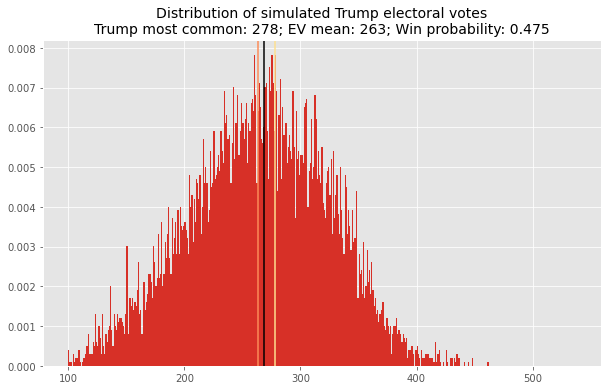

In [34]:
plt.figure(figsize=(10,6))
plt.hist(rep_ev_sim, bins = range(100, 538, 1), density = True, color = '#d73027');
rep_ev_forecast = int(np.array(rep_ev_sim).mean())
rep_most_freq = Counter(rep_ev_sim).most_common(n=1)[0][0]
plt.title('Distribution of simulated Trump electoral votes\nTrump most common: %s; EV mean: %s; Win probability: %s'%
          (rep_most_freq, rep_ev_forecast, (np.array(rep_ev_sim) > 269).mean().round(3)), fontsize = 14);
plt.axvline(269, color = 'black');
plt.axvline(rep_ev_forecast, color = '#fc8d59');
plt.axvline(rep_most_freq, color = '#fee090');

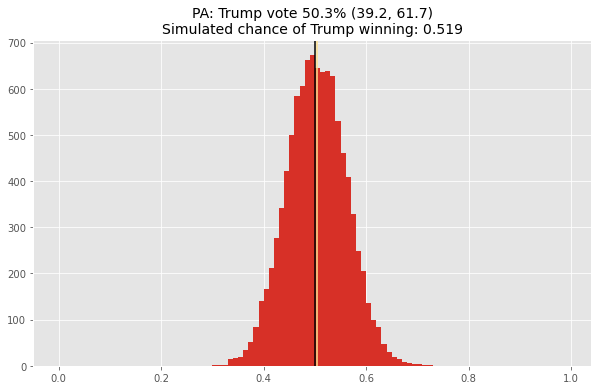

In [37]:
rep_state_win_prob = rep_state_wins / number_of_simulations
plot_state = 'PA'

plt.figure(figsize=(10,6))
plt.hist(rep_state_votes[plot_state], bins = np.arange(0,1,0.01),color = '#d73027');
plt.title('%s: Trump vote %s%% (%s, %s)\nSimulated chance of Trump winning: %s'%(plot_state,
                                                   np.round((100*rep_state_votes[plot_state].mean()),1),
                                                   np.round((100*rep_state_votes[plot_state].quantile(0.025)),1),
                                                   np.round((100*rep_state_votes[plot_state].quantile(0.975)),1),
                                                   rep_state_win_prob[plot_state]),
          fontsize = 14)
plt.axvline(0.5, color = 'black');
plt.axvline(rep_state_votes[plot_state].mean(), color = '#fee090');

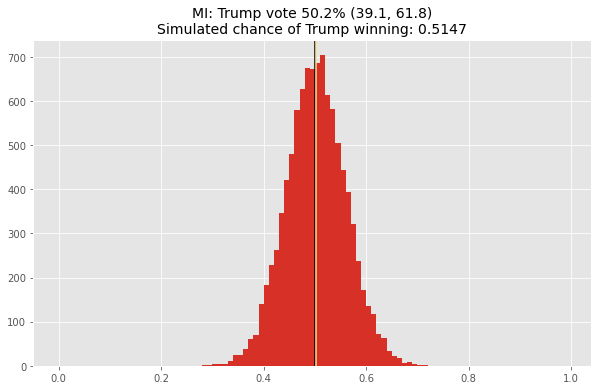

In [38]:
plot_state = 'MI'

plt.figure(figsize=(10,6))
plt.hist(rep_state_votes[plot_state], bins = np.arange(0,1,0.01),color = '#d73027');
plt.title('%s: Trump vote %s%% (%s, %s)\nSimulated chance of Trump winning: %s'%(plot_state,
                                                   np.round((100*rep_state_votes[plot_state].mean()),1),
                                                   np.round((100*rep_state_votes[plot_state].quantile(0.025)),1),
                                                   np.round((100*rep_state_votes[plot_state].quantile(0.975)),1),
                                                   rep_state_win_prob[plot_state]),
          fontsize = 14)
plt.axvline(0.5, color = 'black');
plt.axvline(rep_state_votes[plot_state].mean(), color = '#fee090');

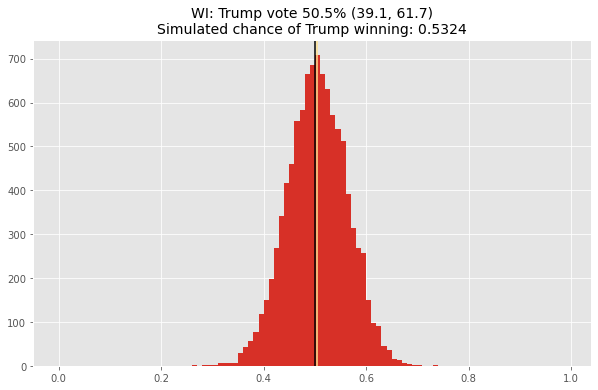

In [39]:
plot_state = 'WI'

plt.figure(figsize=(10,6))
plt.hist(rep_state_votes[plot_state], bins = np.arange(0,1,0.01),color = '#d73027');
plt.title('%s: Trump vote %s%% (%s, %s)\nSimulated chance of Trump winning: %s'%(plot_state,
                                                   np.round((100*rep_state_votes[plot_state].mean()),1),
                                                   np.round((100*rep_state_votes[plot_state].quantile(0.025)),1),
                                                   np.round((100*rep_state_votes[plot_state].quantile(0.975)),1),
                                                   rep_state_win_prob[plot_state]),
          fontsize = 14)
plt.axvline(0.5, color = 'black');
plt.axvline(rep_state_votes[plot_state].mean(), color = '#fee090');